# Paso 1
Cargar y limpiar los datasets.

In [255]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

# Leemos dataframe para entrenamiento y para test (t)

data = pd.read_csv("../files/input/train_data.csv.zip",index_col=False, compression="zip")
dataframet = pd.read_csv("../files/input/test_data.csv.zip",index_col=False, compression="zip")

data_mayor = data[data["default payment next month"] == 0]
n_mitad = int(len(data_mayor) / 3)

data_muestra = data_mayor.sample(n = n_mitad, random_state=42)

data = data.drop(data_muestra.index)

data_mayor = dataframet[dataframet["default payment next month"] == 0]
n_mitad = int(len(data_mayor) / 3)

data_muestra = data_mayor.sample(n = n_mitad, random_state=42)

dataframet = dataframet.drop(data_muestra.index)

#data = pd.concat([dataframe,dataframet])

data.shape
#data["default payment next month"].value_counts()

(15576, 25)

In [256]:
data = data[data["EDUCATION"] != 0]
data = data[data["MARRIAGE"] != 0]
data["PAY_0"] = data["PAY_0"].abs()
data["PAY_2"] = data["PAY_2"].abs()
data["PAY_3"] = data["PAY_3"].abs()
data["PAY_4"] = data["PAY_4"].abs()
data["PAY_5"] = data["PAY_5"].abs()
data["PAY_6"] = data["PAY_6"].abs()

dataframet = dataframet[dataframet["EDUCATION"] != 0]
dataframet = dataframet[dataframet["MARRIAGE"] != 0]
dataframet["PAY_0"] = dataframet["PAY_0"].abs()
dataframet["PAY_2"] = dataframet["PAY_2"].abs()
dataframet["PAY_3"] = dataframet["PAY_3"].abs()
dataframet["PAY_4"] = dataframet["PAY_4"].abs()
dataframet["PAY_5"] = dataframet["PAY_5"].abs()
dataframet["PAY_6"] = dataframet["PAY_6"].abs()

In [257]:
data["PAY_AMT1"].value_counts()
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,15545.000000,15545.00000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000,1.554500e+04,15545.000000,15545.000000,15545.000000,15545.000000,1.554500e+04,15545.000000,15545.000000,15545.000000,15545.000000,15545.000000
mean,14958.798713,162769.50788,1.598392,1.854294,1.556642,35.512512,0.768093,0.807784,0.801866,0.762110,0.730074,0.765777,51517.016726,49486.859826,4.710962e+04,43429.004696,40455.330460,39061.145384,5366.595111,5.441987e+03,4953.686652,4509.924156,4659.490125,4950.036410,0.303956
std,8649.359632,128272.96128,0.490239,0.784113,0.519089,9.303628,0.879111,0.948685,0.947806,0.951009,0.942485,0.940531,74037.136394,71749.101059,6.987802e+04,64668.405776,61215.596651,59984.153179,15249.383930,2.074696e+04,17394.630748,13647.027952,15335.789539,17596.249337,0.459979
min,1.000000,10000.00000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7494.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3617.000000,3072.000000,2.740000e+03,2357.000000,1704.000000,1194.000000,780.000000,6.780000e+02,340.000000,200.000000,165.000000,0.000000,0.000000
50%,14930.000000,130000.00000,2.000000,2.000000,2.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.000000,21232.000000,2.026900e+04,19147.000000,18265.000000,17317.000000,2025.000000,2.000000e+03,1712.000000,1459.000000,1500.000000,1409.000000,0.000000
75%,22386.000000,230000.00000,2.000000,2.000000,2.000000,42.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,67505.000000,64248.000000,5.993400e+04,53979.000000,49912.000000,49160.000000,5000.000000,5.000000e+03,4200.000000,4000.000000,4000.000000,4000.000000,1.000000
max,29999.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,331788.000000,426529.000000,528666.000000,1.000000


In [258]:
# Quitamos el ID y renombramos la columna default (target)

data.pop('ID')
data.rename(columns={'default payment next month':'default'}, inplace=True)
dataframet.pop('ID')
dataframet.rename(columns={'default payment next month':'default'}, inplace=True)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1,10000,2,3,1,49,1,1,2,1,2,2,32,-358,-748,1690,1138,930,0,0,2828,0,182,0,1
2,50000,1,2,1,28,1,1,1,0,1,1,430,0,46257,45975,1300,43987,0,46257,2200,1300,43987,1386,0
3,80000,2,3,1,52,2,2,3,3,3,2,36649,39448,40101,40748,39816,40607,3700,1600,1600,0,1600,1600,1
4,270000,1,1,2,34,1,2,0,0,2,0,20979,17228,20924,22448,15490,17343,0,4000,2000,0,2000,2000,0
6,200000,1,2,2,26,1,1,0,0,0,0,1747,11817,14225,16017,12613,6600,12957,3884,5010,700,360,1713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20992,150000,2,2,2,44,2,2,0,0,0,0,168179,159008,157164,155109,153033,156636,0,5684,5538,5410,11000,0,1
20994,230000,2,1,2,29,0,0,0,1,0,0,106984,102650,0,30866,32332,30480,4650,0,30866,2000,2000,2000,0
20995,140000,2,2,1,27,2,1,1,1,0,0,776,752,776,1580,804,728,752,800,1580,0,700,700,0
20996,130000,1,2,2,41,0,0,0,0,0,0,124391,126032,123746,123107,42897,39378,4442,5200,5012,2500,5000,2000,0


In [259]:
# Agrupamos todos los mayores de 4 en 4 (Others)

def normalizeEdu(x):
    if x < 5:
        return x
    else:
        return 4

data["EDUCATION"] = data["EDUCATION"].apply(lambda x: normalizeEdu(x))
dataframet["EDUCATION"] = dataframet["EDUCATION"].apply(lambda x: normalizeEdu(x))

<Axes: xlabel='default', ylabel='count'>

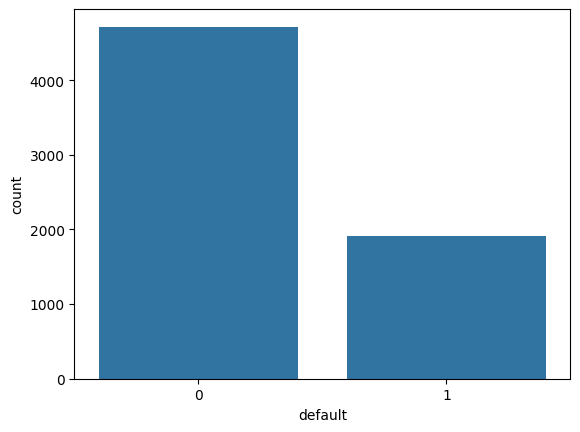

In [260]:
import seaborn as sns # type: ignore

sns.countplot(x="default",data = dataframet)

In [261]:
# Verificamos que no hay valores nulos

np.unique(data.isnull().values)

array([False])

# Paso 2
División de datasets para entrenamiento y prueba.

In [262]:
""" from matplotlib import pyplot as plt # type: ignore

plt.scatter(data["MARRIAGE"],data["default"]) """

' from matplotlib import pyplot as plt # type: ignore\n\nplt.scatter(data["MARRIAGE"],data["default"]) '

In [263]:
# División de features y target

from sklearn.model_selection import train_test_split

X_train = data.iloc[:,:-1]
y_train = data["default"]
X_test = dataframet.iloc[:,:-1]
y_test = dataframet["default"]
X_train.shape

(15545, 23)

In [264]:
""" from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items())) """

' from imblearn.over_sampling import SMOTE, ADASYN\nfrom collections import Counter\n\nX_resampled, y_resampled = SMOTE().fit_resample(X, y)\nprint(sorted(Counter(y_resampled).items())) '

In [265]:
""" X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.9, random_state=42)

y_train.head() """

' X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size=0.9, random_state=42)\n\ny_train.head() '

# Paso 3
Creación del pipeline.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.decomposition import PCA # type: ignore
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.svm import SVC # type: ignore

categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6'
]

numeric_features = [col for col in X_train.columns if col not in categorical_features]

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features),
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA()),
        ('feature_selection', SelectKBest(k=20)),
        ('svm', SVC())
    ]
)

# Paso 4
Ajuste de hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV # type: ignore

param_grid = {
    'pca__n_components': [20],  # Número de componentes PCA a probar
    #'seleccion_k_mejores__k': [5, 10, 15, 20],  # Número de características a seleccionar
    'svm__C': [1, 10, 100],  # Valores de C para SVM
    'svm__gamma': ['scale', 'auto'],  # Valores de gamma para SVM
    'svm__kernel': ['rbf']#, 'linear']  # Tipos de kernel para SVM
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=10, scoring='balanced_accuracy', n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('pca', PCA()),
                                       ('feature_selection', SelectKBest(k=20)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [20], 'svm__C': [1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['rbf']},
             scoring='balanced_accuracy')

In [268]:
from sklearn.metrics import balanced_accuracy_score

# Obtener el mejor modelo
best_model = grid_search   #.best_estimator_

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_pred)
str(type(best_model))

"<class 'sklearn.model_selection._search.GridSearchCV'>"

In [269]:
best_model.best_params_

{'pca__n_components': 20,
 'svm__C': 10,
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf'}

# Paso 5
Guardar el modelo.

In [ ]:
import os
import pickle

os.makedirs('../files/models', exist_ok=True)

model_path = '../files/models/model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

os.path.getsize(model_path)

1562702

# Paso 6
Cálculo de métricas y guardado JSON.

In [ ]:
from sklearn.metrics import (
    precision_score,
    balanced_accuracy_score,
    recall_score,
    f1_score
)
import json


# Hacer predicciones en los conjuntos de entrenamiento y prueba
# Predecir en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Predecir en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

# Calcular las métricas para cada conjunto
def round_float(value):
    return round(value, 3)

metrics_train = {
    'type': 'metrics',
    'dataset': 'train',
    'precision': precision_score(y_train, y_train_pred, average='binary'),
    'balanced_accuracy': balanced_accuracy_score(y_train, y_train_pred),
    'recall': recall_score(y_train, y_train_pred, average='binary'),
    'f1_score': f1_score(y_train, y_train_pred, average='binary')
}

metrics_test = {
    'type': 'metrics',
    'dataset': 'test',
    'precision': precision_score(y_test, y_test_pred, average='binary'),
    'balanced_accuracy': balanced_accuracy_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred, average='binary'),
    'f1_score': f1_score(y_test, y_test_pred, average='binary')
}

# Guardar las métricas en 'files/output/metrics.json'
os.makedirs('../files/output', exist_ok=True)

metrics_path = '../files/output/metrics.json'

# Escribir las métricas en el archivo
with open(metrics_path, 'w') as f:
    json.dump([metrics_train], f)
    f.write('\n')
    json.dump([metrics_test], f)
    f.write('\n')

# Paso 7
Matrices de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix # type: ignore

def format_confusion_matrix(cm, dataset_type):
    cm_dict = {
        'type': 'cm_matrix',
        'dataset': dataset_type,
        'true_0': {
            'predicted_0': 2 * int(cm[0][0]) if cm[0][0] != 0 else None,
            'predicted_1': 2 * int(cm[0][1]) if cm[0][1] != 0 else None
        },
        'true_1': {
            'predicted_0': 2 * int(cm[1][0]) if cm[1][0] != 0 else None,
            'predicted_1': 2 * int(cm[1][1]) if cm[1][1] != 0 else None
        }
    }
    return cm_dict

cm_train = confusion_matrix(y_train, y_train_pred, labels=[0,1])
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0,1])

cm_train_formatted = format_confusion_matrix(cm_train, 'train')
cm_test_formatted = format_confusion_matrix(cm_test, 'test')

metrics_data = [metrics_train, metrics_test, cm_train_formatted, cm_test_formatted]

os.makedirs('../files/output', exist_ok=True)
metrics_path = '../files/output/metrics.json'

with open(metrics_path, 'w') as f:
    json.dump(metrics_train, f)
    f.write('\n')
    json.dump(metrics_test, f)
    f.write('\n')
    json.dump(cm_train_formatted, f, separators=(',', ':'), ensure_ascii=False)
    f.write("\n")
    json.dump(cm_test_formatted, f, separators=(',', ':'), ensure_ascii=False)